In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import graphviz

In [20]:
classifiers = ['DecisionTree']

models = [DecisionTreeClassifier(random_state=0)]

def split(df,label):
    X_train, X_test, Y_train, Y_test = train_test_split(df, label, test_size=0.25, random_state=42, stratify=label)
    return X_train, X_test, Y_train, Y_test

def acc_score(df,label):
    score = pd.DataFrame({"Classifier":classifiers})
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
    score["Accuracy"] = acc
    score.sort_values(by="Accuracy", ascending=False,inplace = True)
    score.reset_index(drop=True, inplace=True)
    return score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    plt.show()

In [21]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    models = []
    for chromosome in population:
        logmodel = DecisionTreeClassifier(random_state=0)
        logmodel.fit(X_train.iloc[:,chromosome], Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
        models.append(logmodel)
    scores, population, models = np.array(scores), np.array(population), np.array(models)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1]), list(models[inds][::-1])

def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    for n in range(64, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0, mutation_range):
            pos = randint(0, n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_after_cross[n] = chromo
    return pop_after_cross

def generations(df, label, size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, Y_train, Y_test):
    best_chromo = []
    best_score = []
    best_models = []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit, models = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])

        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)

        best_score.append(scores[0])
        best_chromo.append(pop_after_fit[0])
        best_models.append(models[0])

    return best_chromo, best_score, best_models

In [22]:
data_hd = pd.read_csv('./encoded_heart_disease.csv')

print(data_hd.shape)
data_hd.head()

(920, 23)


age  trestbps   chol  thalach  oldpeak   ca  sex  fbs  exang  cp_1.0  ...  \
0  63.0     145.0  233.0    150.0      2.3  0.0  1.0    1      0     1.0  ...   
1  67.0     160.0  286.0    108.0      1.5  3.0  1.0    0      1     0.0  ...   
2  67.0     120.0  229.0    129.0      2.6  2.0  1.0    0      1     0.0  ...   
3  37.0     130.0  250.0    187.0      3.5  0.0  1.0    0      0     0.0  ...   
4  41.0     130.0  204.0    172.0      1.4  0.0  0.0    0      0     0.0  ...   

   restecg_0  restecg_1  restecg_2  slope_1  slope_2  slope_3  thal_3.0  \
0        0.0        0.0        1.0      0.0      0.0      1.0       0.0   
1        0.0        0.0        1.0      0.0      1.0      0.0       1.0   
2        0.0        0.0        1.0      0.0      1.0      0.0       0.0   
3        1.0        0.0        0.0      0.0      0.0      1.0       1.0   
4        0.0        0.0        1.0      1.0      0.0      0.0       1.0   

   thal_6.0  thal_7.0  num  
0       1.0       0.0    0  
1       0.0       0.0    1  
2       0.0       1.0    1  
3       0.0       0.0    0  
4       0.0       0.0    0  

[5 rows x 23 columns]

In [23]:
print(data_hd.shape)
data_hd.head()

(920, 23)


age  trestbps   chol  thalach  oldpeak   ca  sex  fbs  exang  cp_1.0  ...  \
0  63.0     145.0  233.0    150.0      2.3  0.0  1.0    1      0     1.0  ...   
1  67.0     160.0  286.0    108.0      1.5  3.0  1.0    0      1     0.0  ...   
2  67.0     120.0  229.0    129.0      2.6  2.0  1.0    0      1     0.0  ...   
3  37.0     130.0  250.0    187.0      3.5  0.0  1.0    0      0     0.0  ...   
4  41.0     130.0  204.0    172.0      1.4  0.0  0.0    0      0     0.0  ...   

   restecg_0  restecg_1  restecg_2  slope_1  slope_2  slope_3  thal_3.0  \
0        0.0        0.0        1.0      0.0      0.0      1.0       0.0   
1        0.0        0.0        1.0      0.0      1.0      0.0       1.0   
2        0.0        0.0        1.0      0.0      1.0      0.0       0.0   
3        1.0        0.0        0.0      0.0      0.0      1.0       1.0   
4        0.0        0.0        1.0      1.0      0.0      0.0       1.0   

   thal_6.0  thal_7.0  num  
0       1.0       0.0    0  
1       0.0       0.0    1  
2       0.0       1.0    1  
3       0.0       0.0    0  
4       0.0       0.0    0  

[5 rows x 23 columns]

In [24]:
data_hd.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex', 'fbs',
       'exang', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'slope_3', 'thal_3.0',
       'thal_6.0', 'thal_7.0', 'num'],
      dtype='object')

In [25]:
data_hd.iloc[:, :-1]

age  trestbps   chol  thalach  oldpeak   ca  sex  fbs  exang  cp_1.0  \
0    63.0     145.0  233.0    150.0      2.3  0.0  1.0    1      0     1.0   
1    67.0     160.0  286.0    108.0      1.5  3.0  1.0    0      1     0.0   
2    67.0     120.0  229.0    129.0      2.6  2.0  1.0    0      1     0.0   
3    37.0     130.0  250.0    187.0      3.5  0.0  1.0    0      0     0.0   
4    41.0     130.0  204.0    172.0      1.4  0.0  0.0    0      0     0.0   
..    ...       ...    ...      ...      ...  ...  ...  ...    ...     ...   
915  54.0     127.0  333.0    154.0      0.0  0.0  0.0    1      0     0.0   
916  62.0     130.0  139.0    140.0      0.5  0.0  1.0    0      0     1.0   
917  55.0     122.0  223.0    100.0      0.0  0.0  1.0    1      0     0.0   
918  58.0     130.0  385.0    140.0      0.5  0.0  1.0    1      0     0.0   
919  62.0     120.0  254.0     93.0      0.0  0.0  1.0    0      1     0.0   

     ...  cp_4.0  restecg_0  restecg_1  restecg_2  slope_1  slope_2  slope_3  \
0    ...     0.0        0.0        0.0        1.0      0.0      0.0      1.0   
1    ...     1.0        0.0        0.0        1.0      0.0      1.0      0.0   
2    ...     1.0        0.0        0.0        1.0      0.0      1.0      0.0   
3    ...     0.0        1.0        0.0        0.0      0.0      0.0      1.0   
4    ...     0.0        0.0        0.0        1.0      1.0      0.0      0.0   
..   ...     ...        ...        ...        ...      ...      ...      ...   
915  ...     1.0        0.0        1.0        0.0      0.0      1.0      0.0   
916  ...     0.0        0.0        1.0        0.0      0.0      1.0      0.0   
917  ...     1.0        0.0        1.0        0.0      0.0      1.0      0.0   
918  ...     1.0        0.0        0.0        1.0      0.0      1.0      0.0   
919  ...     0.0        0.0        0.0        1.0      0.0      1.0      0.0   

     thal_3.0  thal_6.0  thal_7.0  
0         0.0       1.0       0.0  
1         1.0       0.0       0.0  
2         0.0       0.0       1.0  
3         1.0       0.0       0.0  
4         1.0       0.0       0.0  
..        ...       ...       ...  
915       1.0       0.0       0.0  
916       1.0       0.0       0.0  
917       0.0       1.0       0.0  
918       1.0       0.0       0.0  
919       1.0       0.0       0.0  

[920 rows x 22 columns]

In [26]:
score1 = acc_score(data_hd.iloc[:, :-1], data_hd['num'])
score1

Classifier  Accuracy
0  DecisionTree  0.717391

In [34]:
X_train, X_test, Y_train, Y_test = split(data_hd.iloc[:, :-1], data_hd['num'])
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
chromo_df, score, best_models = generations(data_hd.iloc[:, :-1],
                                            data_hd['num'],
                                            size=96,
                                            n_feat = data_hd.iloc[:, :-1].shape[1],
                                            n_parents=64,
                                            mutation_rate=0.20,
                                            n_gen=5,
                                            X_train = X_train,
                                            X_test = X_test,
                                            Y_train = Y_train,
                                            Y_test = Y_test)

(690, 22) (230, 22) (690,) (230,)
Best score in generation 1 : [0.8]
Best score in generation 2 : [0.808695652173913]
Best score in generation 3 : [0.8130434782608695]
Best score in generation 4 : [0.8217391304347826]
Best score in generation 5 : [0.8217391304347826]


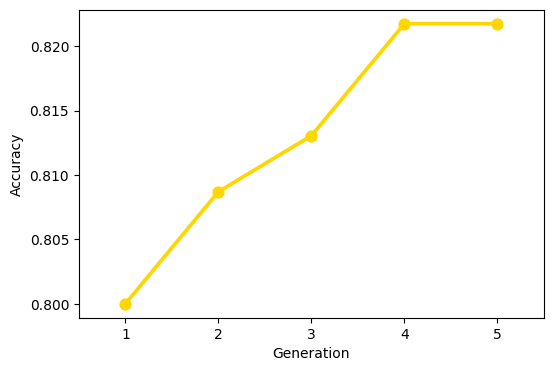

In [35]:
plot(score, 0.9, 1.0,c = "gold")

In [36]:
for index, clf in enumerate(best_models):
  dump(clf, 'model-{}.joblib'.format(index))

In [37]:
clf = load('model-3.joblib')

In [38]:
X_test[clf.feature_names_in_]

sex  exang  cp_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_1  slope_1  slope_2  \
272  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
59   1.0      1     1.0     0.0     0.0     0.0        0.0      1.0      0.0   
610  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
328  1.0      0     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
804  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      0.0   
..   ...    ...     ...     ...     ...     ...        ...      ...      ...   
374  0.0      0     0.0     1.0     0.0     0.0        0.0      0.0      1.0   
590  1.0      1     0.0     0.0     0.0     1.0        1.0      0.0      1.0   
573  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
580  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
308  0.0      0     0.0     1.0     0.0     0.0        0.0      0.0      1.0   

     thal_3.0  thal_6.0  thal_7.0  
272       0.0       0.0       1.0  
59        1.0       0.0       0.0  
610       1.0       0.0       0.0  
328       1.0       0.0       0.0  
804       1.0       0.0       0.0  
..        ...       ...       ...  
374       1.0       0.0       0.0  
590       1.0       0.0       0.0  
573       1.0       0.0       0.0  
580       1.0       0.0       0.0  
308       1.0       0.0       0.0  

[230 rows x 12 columns]

In [39]:
predictions = clf.predict(X_test[clf.feature_names_in_])
print(accuracy_score(Y_test, predictions))

0.8217391304347826


In [40]:
X_test[clf.feature_names_in_]

sex  exang  cp_1.0  cp_2.0  cp_3.0  cp_4.0  restecg_1  slope_1  slope_2  \
272  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
59   1.0      1     1.0     0.0     0.0     0.0        0.0      1.0      0.0   
610  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
328  1.0      0     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
804  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      0.0   
..   ...    ...     ...     ...     ...     ...        ...      ...      ...   
374  0.0      0     0.0     1.0     0.0     0.0        0.0      0.0      1.0   
590  1.0      1     0.0     0.0     0.0     1.0        1.0      0.0      1.0   
573  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
580  1.0      1     0.0     0.0     0.0     1.0        0.0      0.0      1.0   
308  0.0      0     0.0     1.0     0.0     0.0        0.0      0.0      1.0   

     thal_3.0  thal_6.0  thal_7.0  
272       0.0       0.0       1.0  
59        1.0       0.0       0.0  
610       1.0       0.0       0.0  
328       1.0       0.0       0.0  
804       1.0       0.0       0.0  
..        ...       ...       ...  
374       1.0       0.0       0.0  
590       1.0       0.0       0.0  
573       1.0       0.0       0.0  
580       1.0       0.0       0.0  
308       1.0       0.0       0.0  

[230 rows x 12 columns]

In [41]:
predictions

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

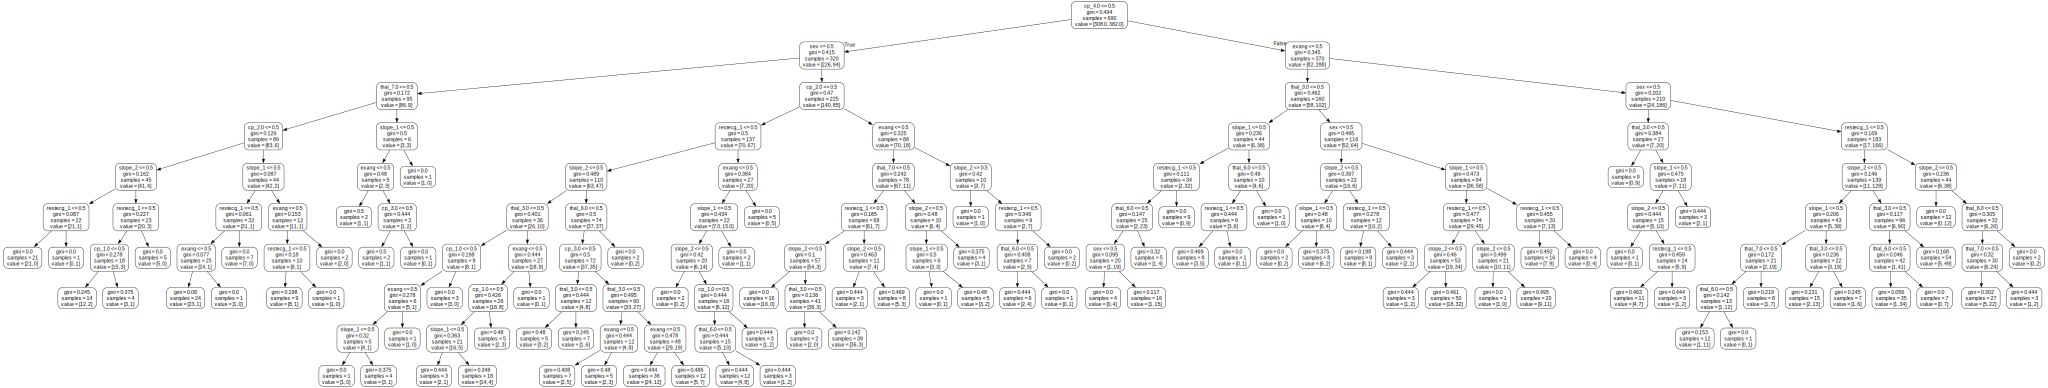

In [42]:
tree.export_graphviz(clf, feature_names=clf.feature_names_in_, rounded=True, out_file='decision.dot')

graphviz.Source(open('./decision.dot').read())